# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
plt.style.use('seaborn-colorblind')
sns.set_theme()
%matplotlib inline

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (20, 10),
          'figure.titlesize': 'x-large',
          'figure.dpi': 150,
         'axes.labelsize': 'x-large',
         'axes.titlesize': 'x-large',
         'xtick.labelsize': 'x-large',
         'ytick.labelsize': 'x-large',
         'savefig.bbox': 'tight'}

plt.rcParams.update(params)

# Processing

In [2]:
df = pd.read_csv('NordPool/Spot_Price_Nordics.csv')
df['datetime']=pd.to_datetime(df['datetime'])
df.drop('Unnamed: 0', axis=1, inplace=True)
df.tail()

NO1            datetime    NO3     NO5    SE1     SE3     SE4  \
45499  204.15 2022-03-12 19:00:00  14.09  204.15  17.03  204.15  204.15   
45500  198.64 2022-03-12 20:00:00  14.14  198.64  16.08  198.64  198.64   
45501  183.74 2022-03-12 21:00:00  14.24  183.74  15.82  168.85  168.85   
45502  182.15 2022-03-12 22:00:00  14.24  182.15  15.59  123.77  123.77   
45503  182.95 2022-03-12 23:00:00  14.34  182.95  15.55  103.01  103.01   

          DK1     DK2  weekday  week  day  hour  
45499  210.25  210.25        5    10   12    19  
45500  204.13  198.64        5    10   12    20  
45501  173.00  170.43        5    10   12    21  
45502  176.50  153.95        5    10   12    22  
45503  182.51  173.39        5    10   12    23

In [3]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df = missing_value_df.sort_values(by = "percent_missing", ascending  =False)
missing_value_df.head(50)

column_name  percent_missing
NO1              NO1              0.0
datetime    datetime              0.0
NO3              NO3              0.0
NO5              NO5              0.0
SE1              SE1              0.0
SE3              SE3              0.0
SE4              SE4              0.0
DK1              DK1              0.0
DK2              DK2              0.0
weekday      weekday              0.0
week            week              0.0
day              day              0.0
hour            hour              0.0

In [4]:
df_viz=df.copy()
regions=['NO1', 'NO3', 'NO5', 'SE1', 'SE3', 'SE4', 'DK1', 'DK2']
df_viz=df_viz.melt(id_vars=['datetime','weekday', 'week', 'day', 'hour'], value_vars=regions)
df_viz.columns=['datetime','weekday', 'week', 'day', 'hour', 'region', 'price']
df_viz['region']=df_viz['region'].astype('category')
df_viz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364032 entries, 0 to 364031
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   datetime  364032 non-null  datetime64[ns]
 1   weekday   364032 non-null  int64         
 2   week      364032 non-null  int64         
 3   day       364032 non-null  int64         
 4   hour      364032 non-null  int64         
 5   region    364032 non-null  category      
 6   price     364032 non-null  float64       
dtypes: category(1), datetime64[ns](1), float64(1), int64(4)
memory usage: 17.0 MB


# Visualizations

## Violinplots

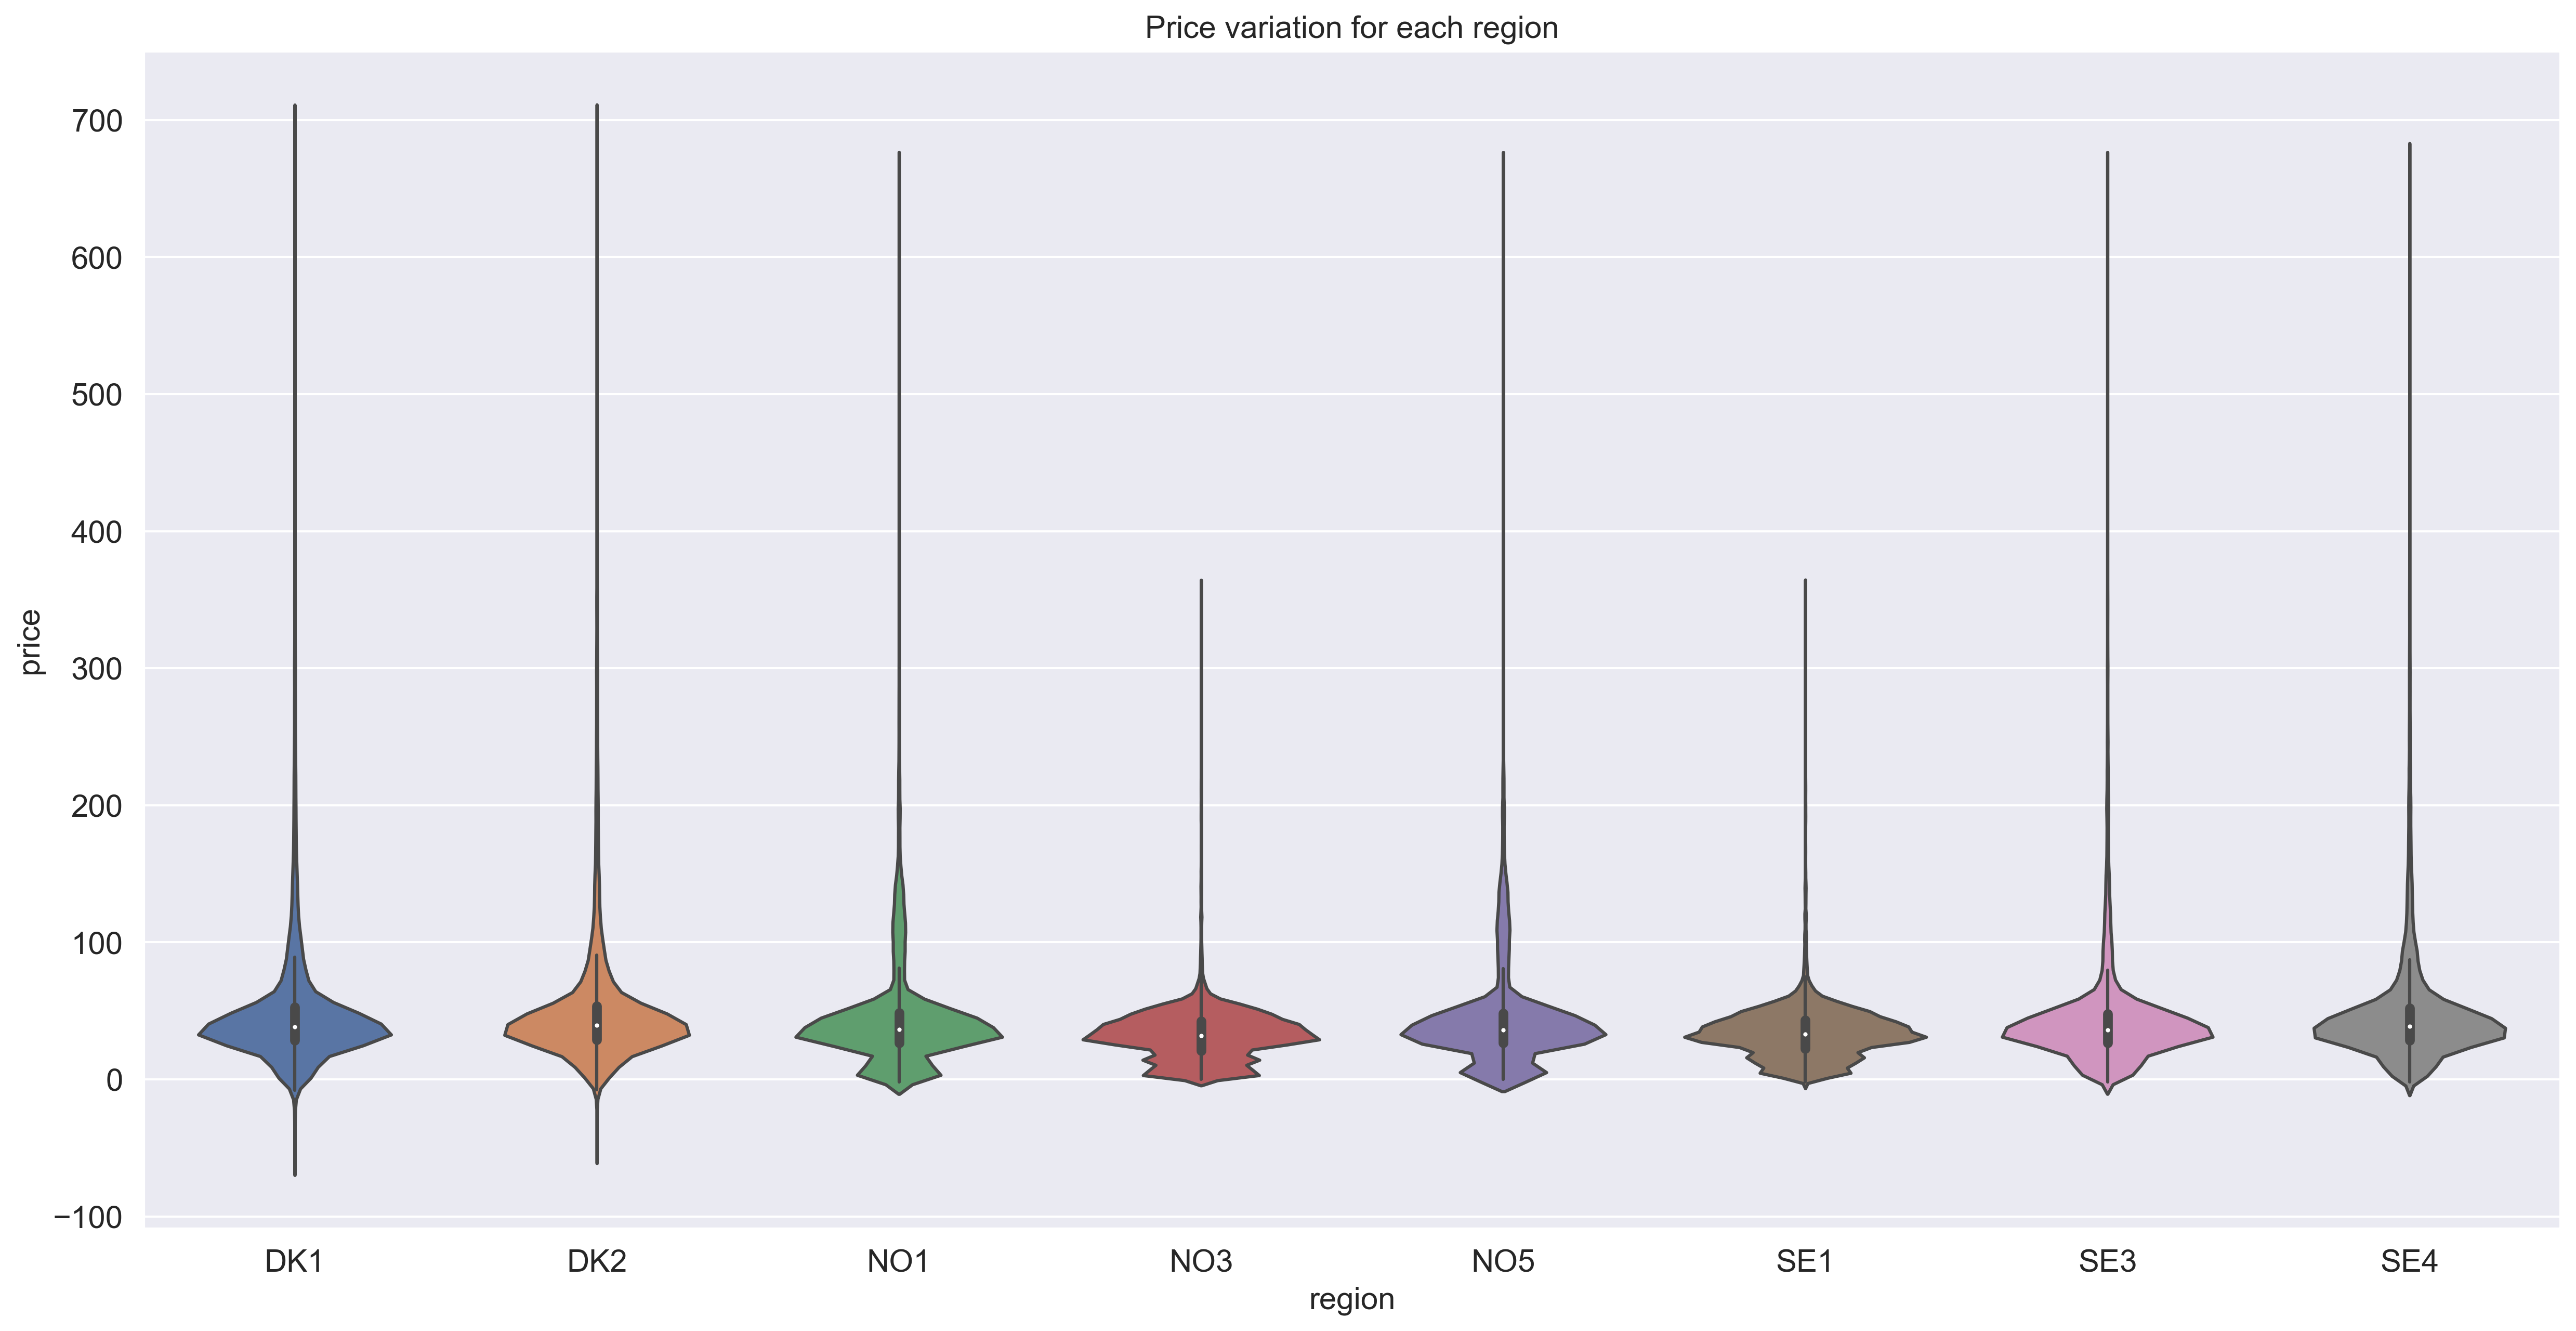

In [5]:
plt.title("Price variation for each region")
sns.violinplot(x = 'region', y = 'price', data = df_viz)
plt.savefig('Plots/Violin_plot_all_regions.jpg')

## Lag Plots

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


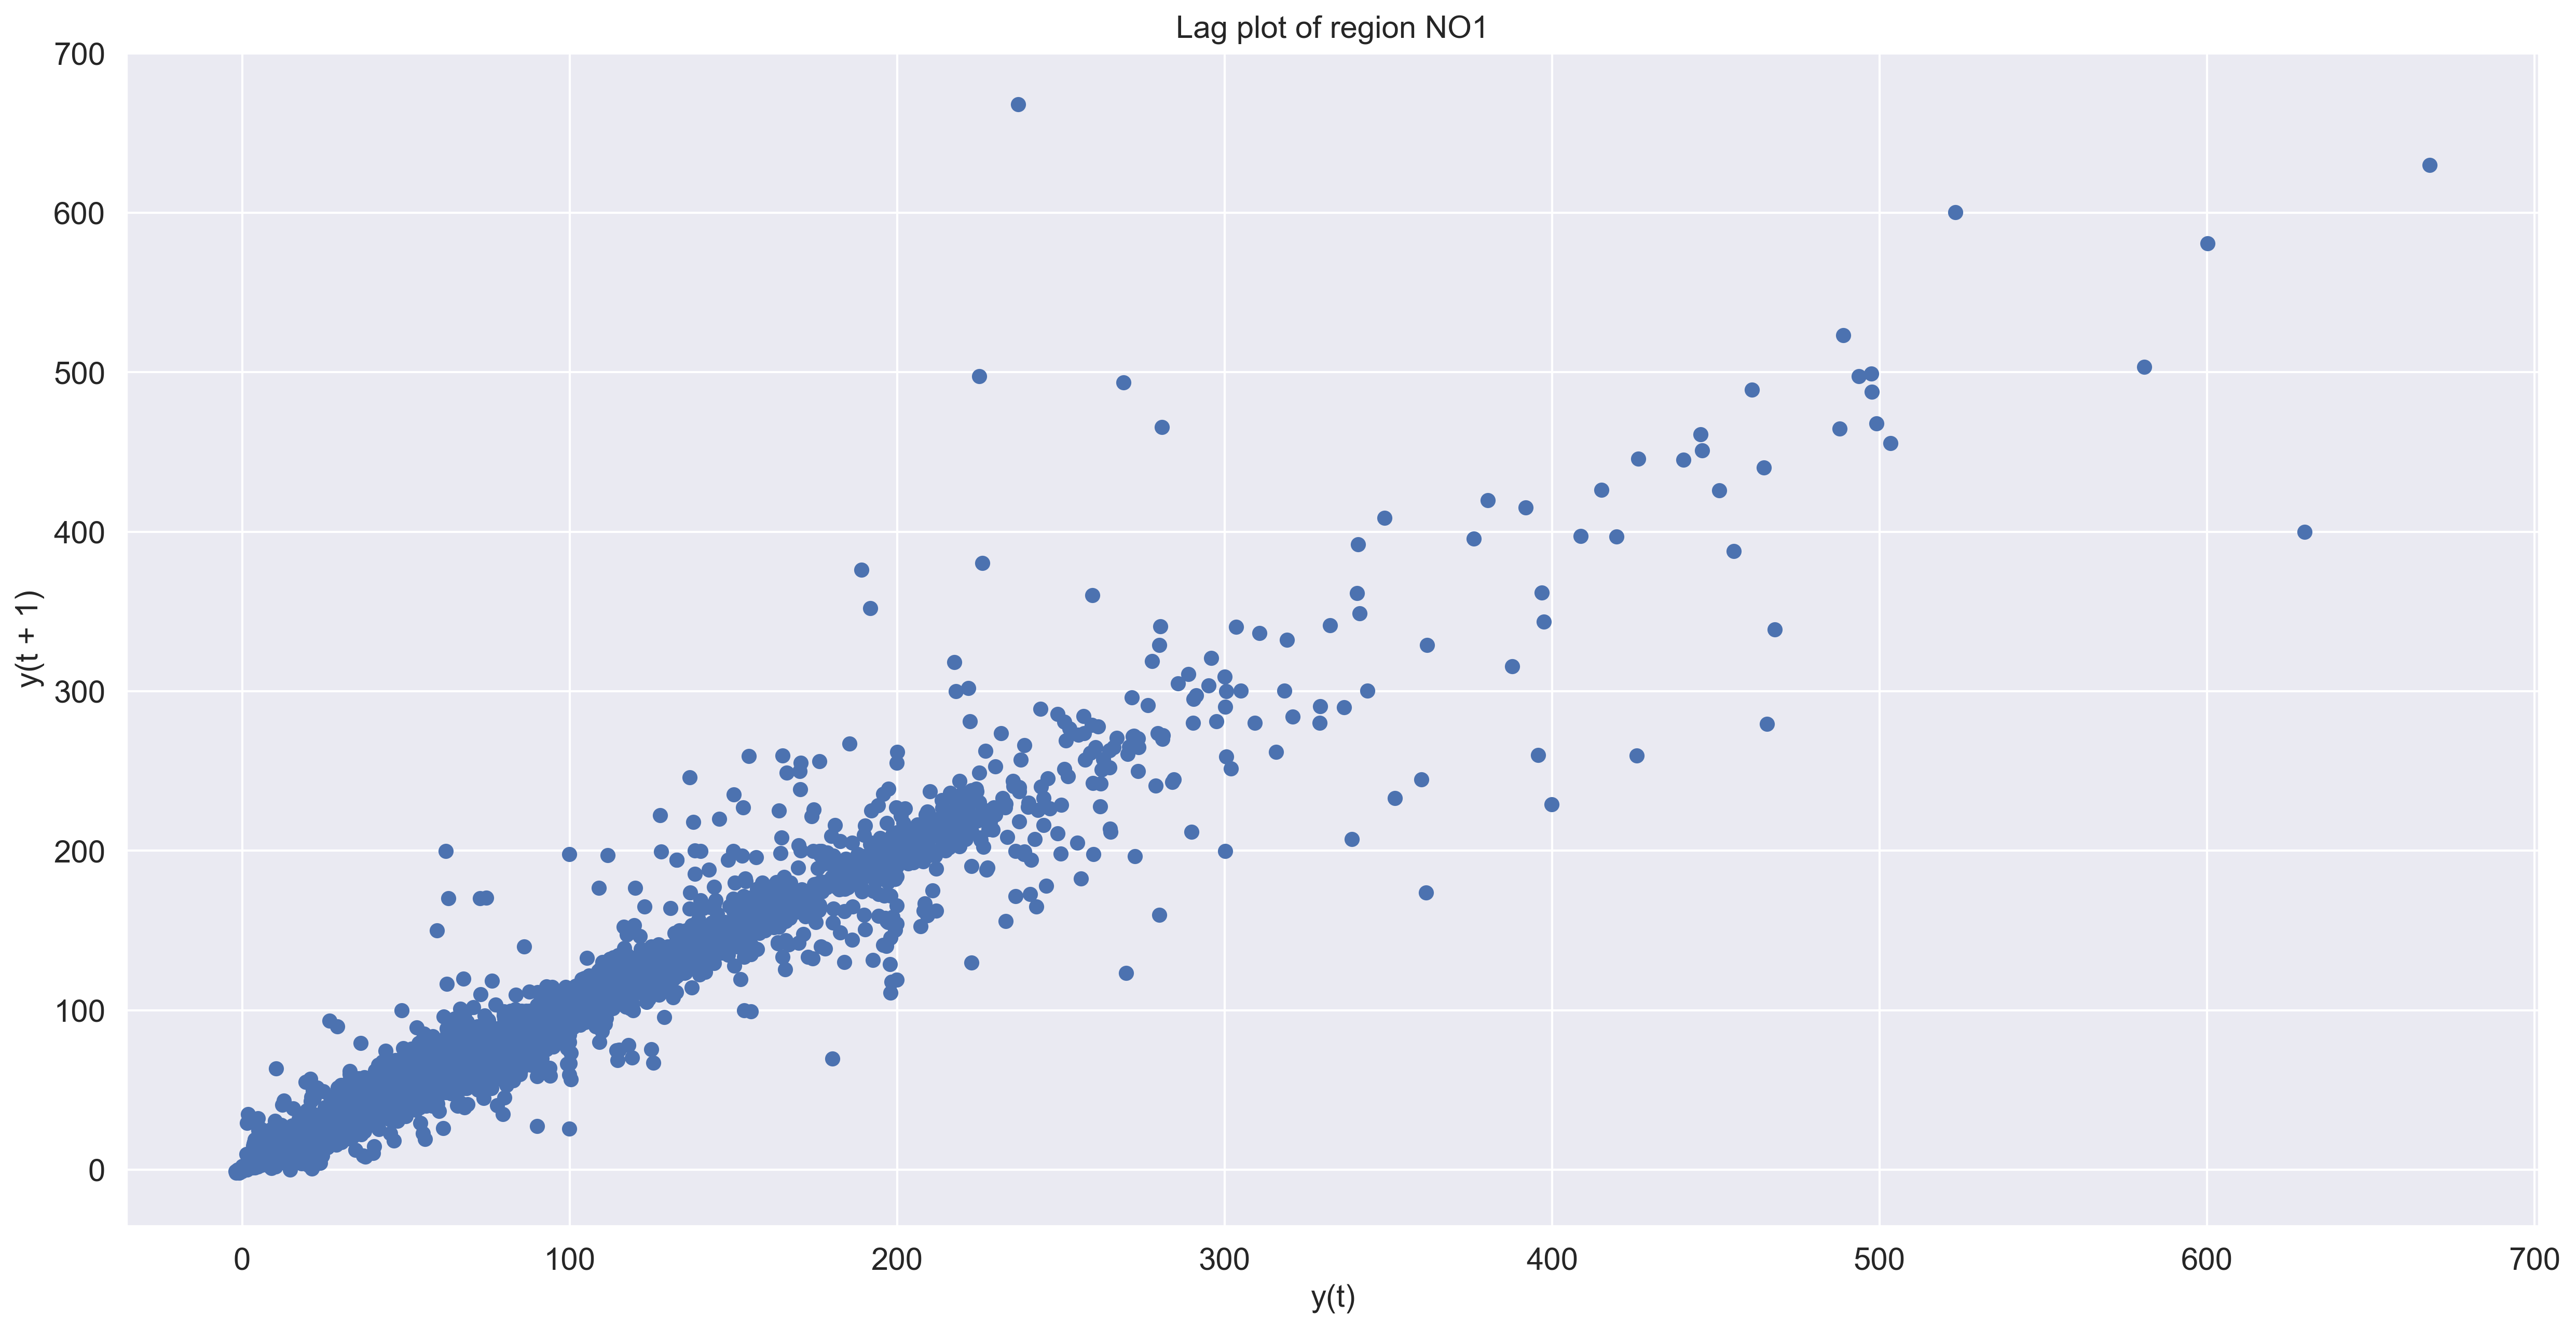

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


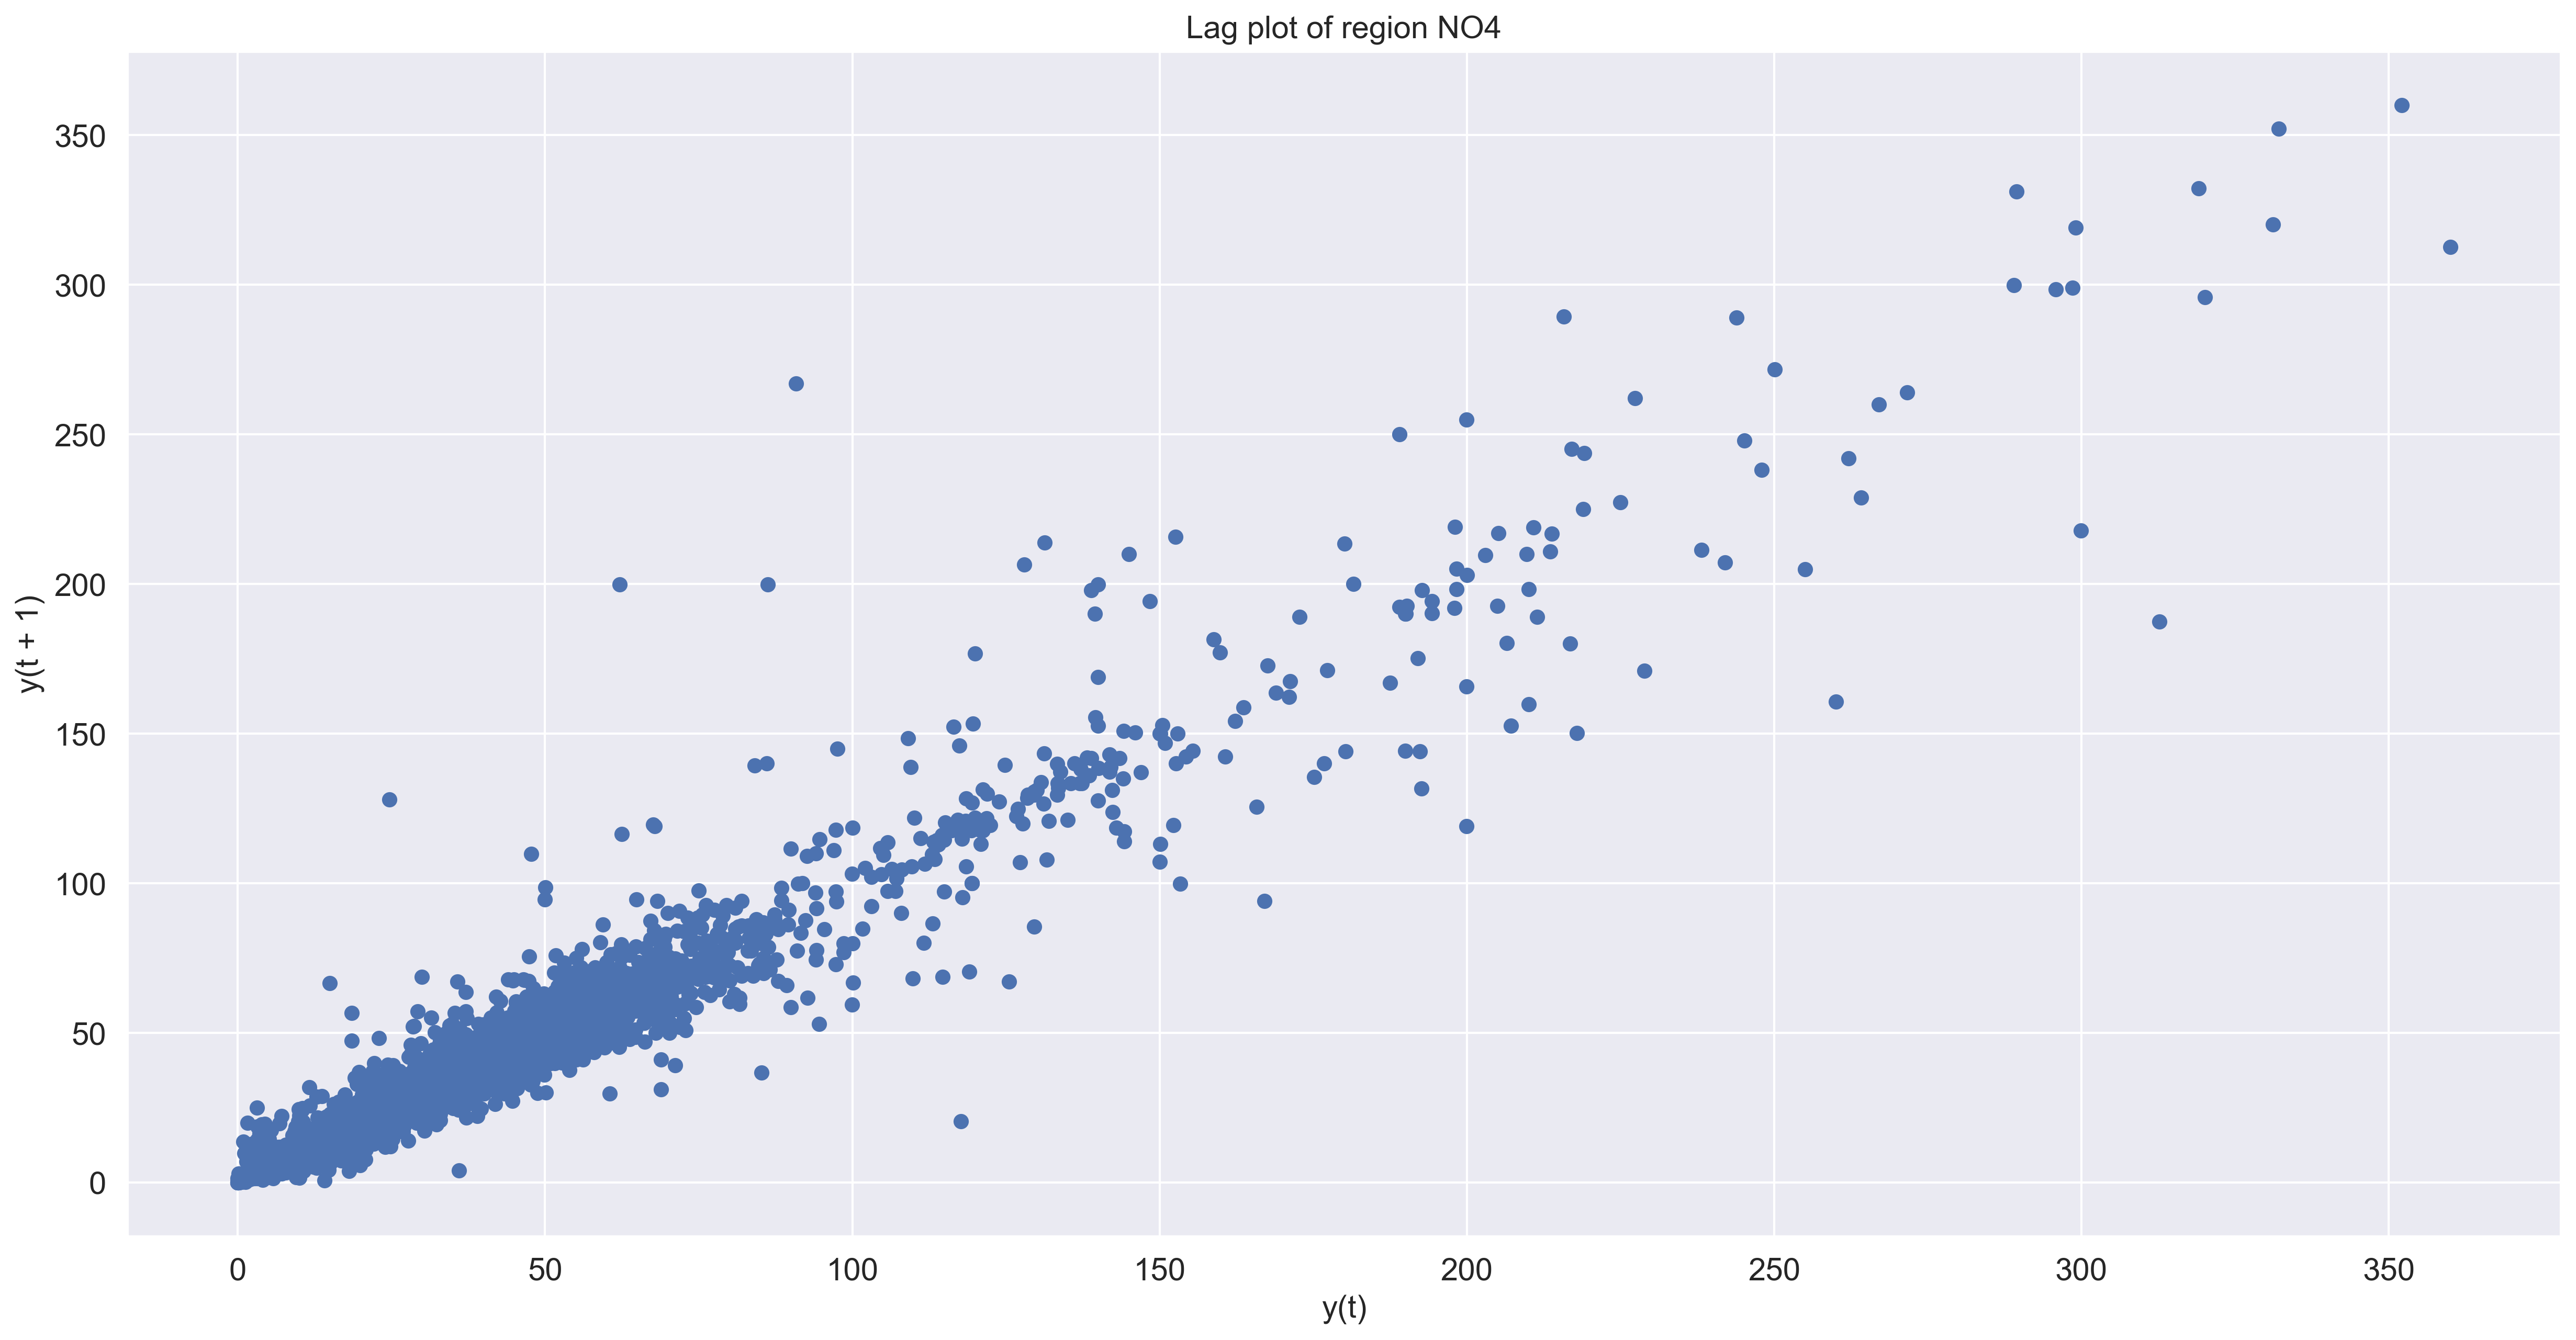

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


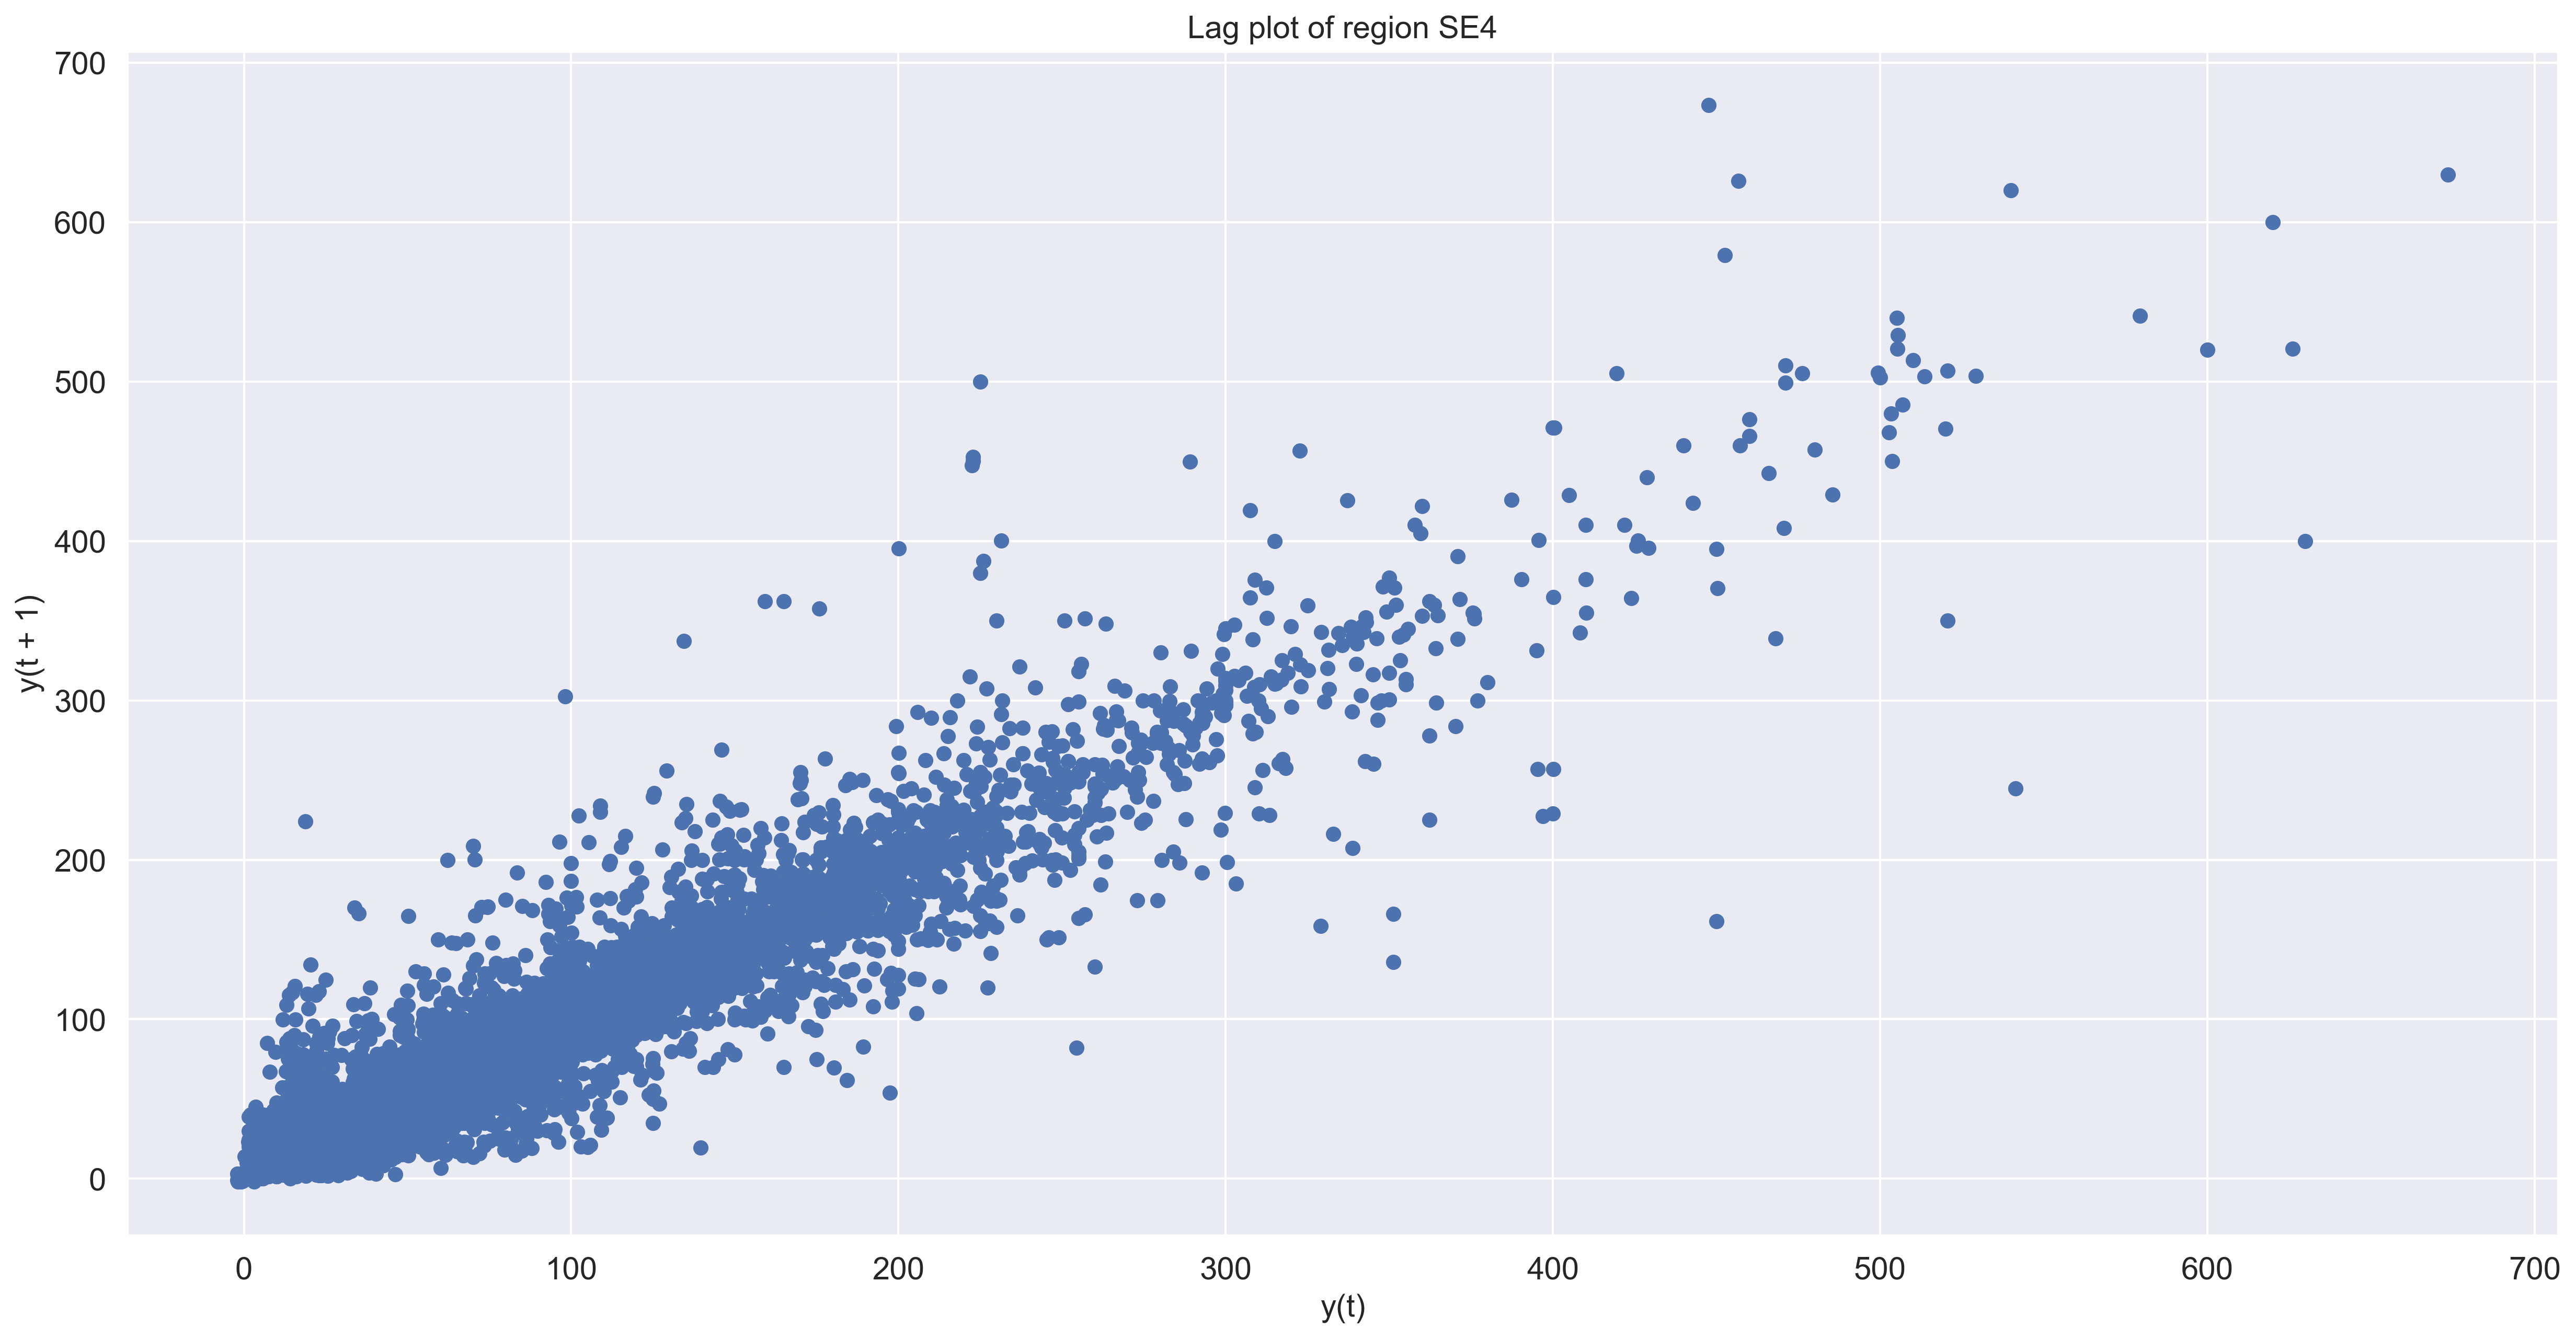

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


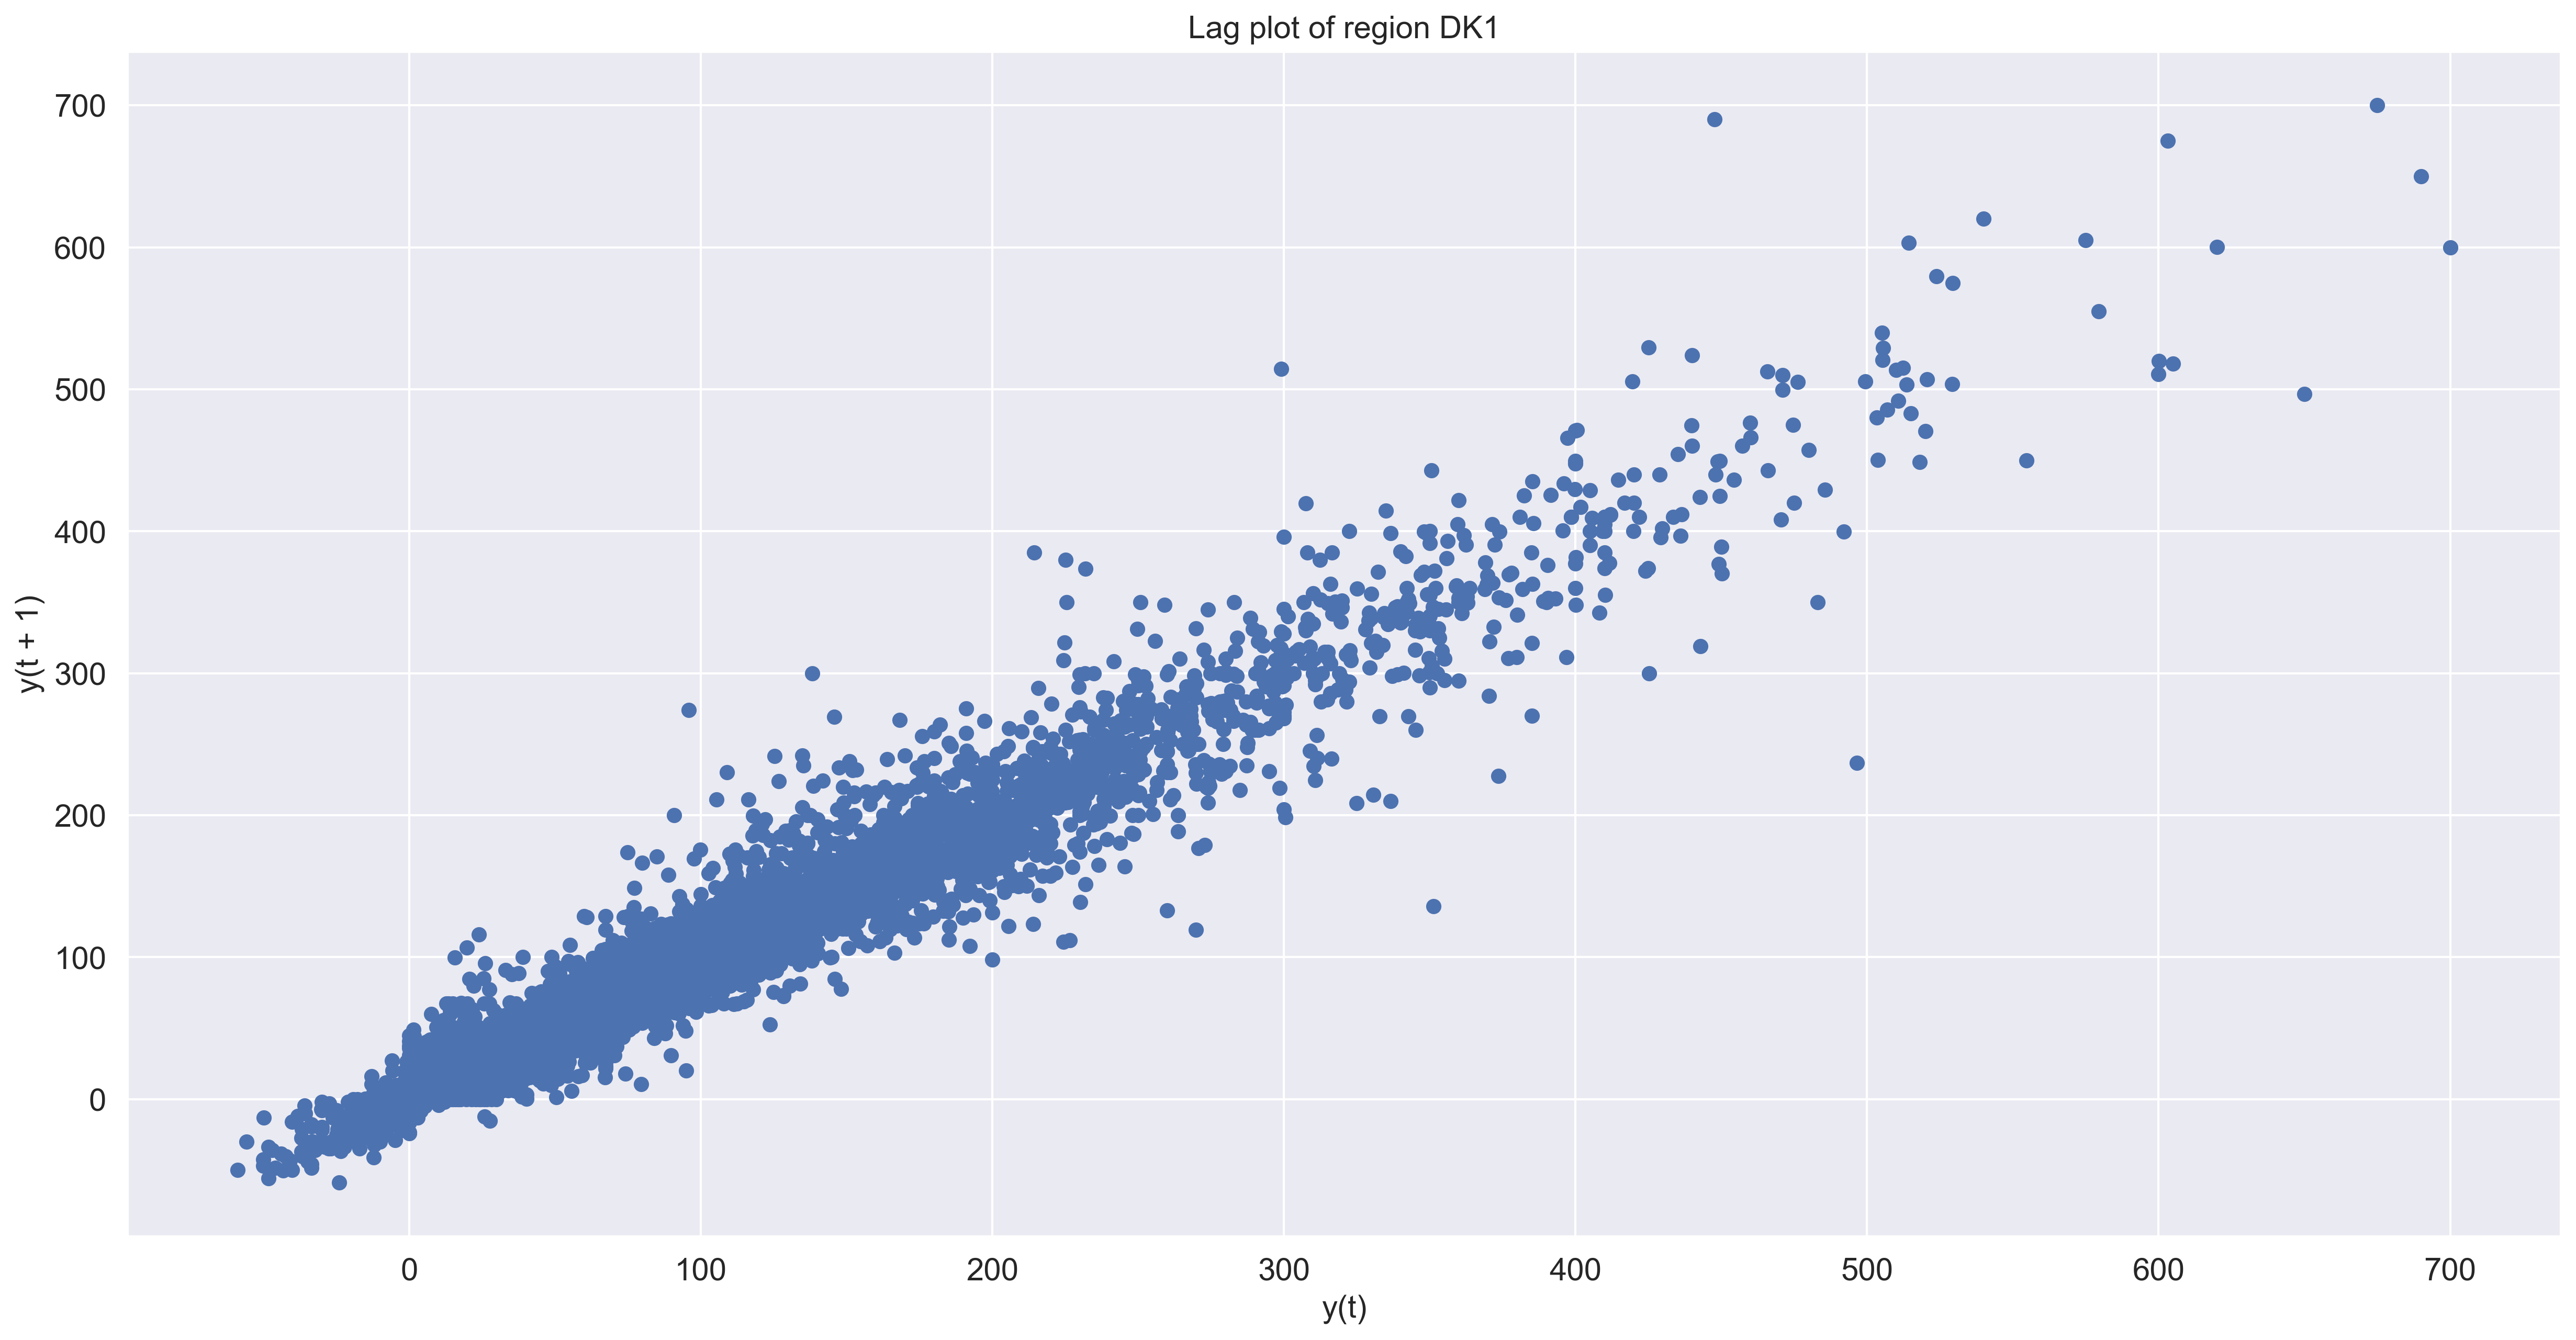

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


In [28]:
from pandas.plotting import lag_plot
for col in regions:
    lag_plot(df[col])
    plt.title(f'Lag plot of region {col}')
    plt.show()

## Comparing-Line plots

In [6]:
### Preparing dataframe
df_viz['year']=df_viz['datetime'].dt.year
df_viz['month']=df_viz['datetime'].dt.month
df_viz['YearMonth'] = df_viz['datetime'].dt.to_period('M')
df_viz.head()

datetime  weekday  week  day  hour region  price  year  month  \
0 2017-01-02 00:00:00        0     1    2     0    NO1  29.36  2017      1   
1 2017-01-02 01:00:00        0     1    2     1    NO1  29.40  2017      1   
2 2017-01-02 02:00:00        0     1    2     2    NO1  28.91  2017      1   
3 2017-01-02 03:00:00        0     1    2     3    NO1  28.11  2017      1   
4 2017-01-02 04:00:00        0     1    2     4    NO1  28.24  2017      1   

  YearMonth  
0   2017-01  
1   2017-01  
2   2017-01  
3   2017-01  
4   2017-01

In [7]:
year_month = df_viz.groupby(by=['YearMonth', 'region'])['price'].mean()
year_month.dropna(axis=0, inplace=True)
year_month=pd.DataFrame(year_month)
year_month.reset_index(inplace=True)
year_month.tail(8)

YearMonth region       price
496   2022-03    DK1  301.268646
497   2022-03    DK2  298.075104
498   2022-03    NO1  196.106840
499   2022-03    NO3   15.127604
500   2022-03    NO5  196.106840
501   2022-03    SE1   16.733646
502   2022-03    SE3  148.362813
503   2022-03    SE4  173.802569

In [8]:
year_month['YearMonth']=year_month['YearMonth'].astype('string')
# https://towardsdatascience.com/8-visualizations-with-python-to-handle-multiple-time-series-data-19b5b2e66dd0
g = sns.relplot(data = year_month, x = "YearMonth", y = "price",
                col = "region", hue = "region",
                kind = "line", palette = "Spectral",   
                linewidth = 4, zorder = 4,
                col_wrap = 4, height = 3, aspect = 1.5, legend = False
               )

#add text and silhouettes
for time, ax in g.axes_dict.items():
    ax.text(.1, .85, time,
            transform = ax.transAxes, fontweight="bold"
           )
    sns.lineplot(data = year_month, x = "YearMonth", y = "price", units="region",
                 estimator = None, color= ".7", linewidth=1, ax=ax
                )

ax.set_xticks('')
g.set_titles("")
g.set_axis_labels("", "price")
plt.suptitle('Price comparison with other regions')
g.tight_layout()
plt.savefig('Plots/Price comparison all regions.jpg')

## Time of the day-Price heatmaps

In [5]:
hour_day = df.groupby(['hour'])[regions].mean()
hour_day=pd.DataFrame(hour_day)
hour_day.tail()

NO1        NO3        NO5        SE1        SE3        SE4  \
hour                                                                     
19    46.580765  34.273254  46.133217  36.661482  52.654293  59.434578   
20    45.275712  33.799863  45.025934  36.214979  49.420132  57.686809   
21    43.817827  32.871814  43.656018  34.639568  44.198196  51.882215   
22    43.030812  32.242036  42.914963  33.788718  41.386345  47.474330   
23    41.905891  31.269873  41.836978  32.445227  38.131793  43.211830   

            DK1        DK2  
hour                        
19    60.665770  63.539451  
20    60.591313  62.500997  
21    56.143333  56.836888  
22    51.812690  51.891741  
23    48.805907  48.079736

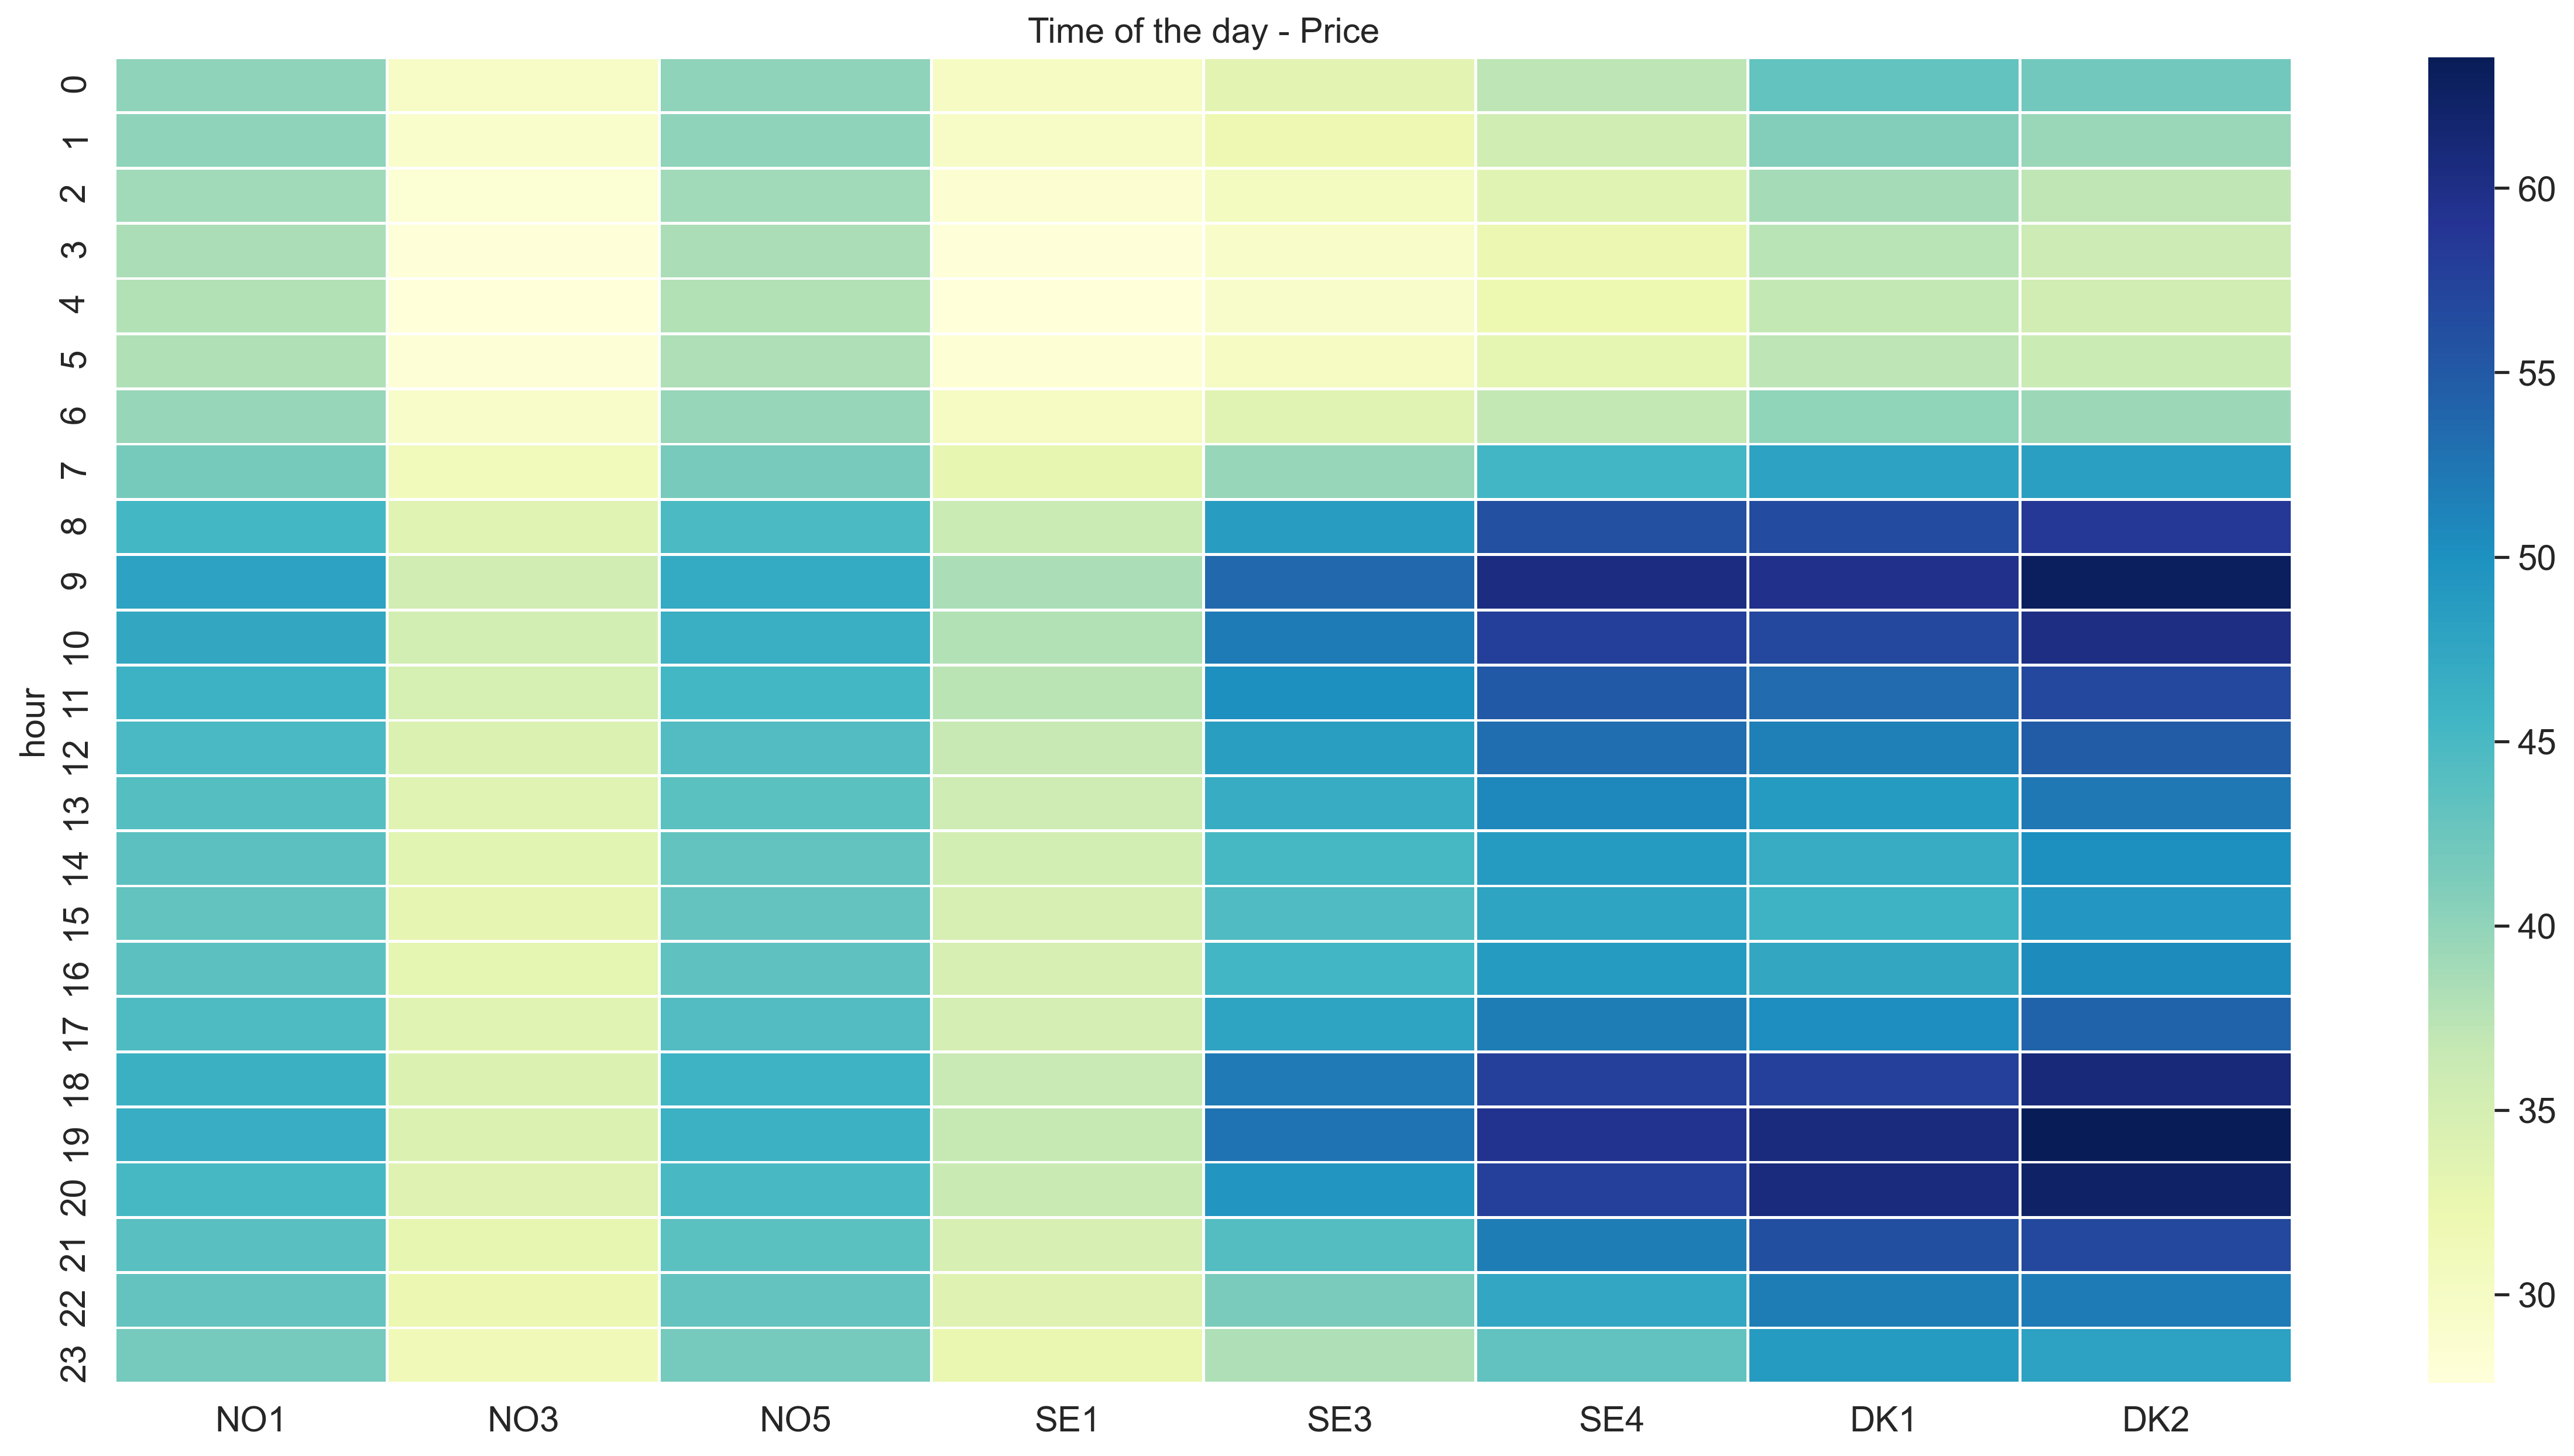

<Figure size 3000x1500 with 0 Axes>

In [7]:
plt.title('Time of the day - Price')
sns.heatmap(hour_day, linewidth=.9, cmap="YlGnBu")
plt.show()
plt.savefig('Plots/Price by time of day all regions.jpg')